In [1]:
import numpy as np
import os
import time
import random
import torch
from Model import Market_Env

from TD3 import utils
from TD3 import TD3
from TD3 import OurDDPG
from TD3 import DDPG


In [2]:
policy_name="TD3"

model_file = f"./models/{policy_name}_latest"
fund_return_src = r'./data/Monthly_Fund_Return_Selected.csv'
feature_src = r'./data/FEATURE.csv'
fund_map_src =r'./data/FUND_MAP_SELECTED.csv'

env =Market_Env(feature_src,fund_map_src,fund_return_src)

# Set seeds
rand_seed =random.randint(0x00000000,0xFFFFFFFF)
env.seed(rand_seed)
torch.manual_seed(rand_seed)
np.random.seed(rand_seed)

state_dim = env.state_dim
action_dim = env.action_dim
max_action = env.max_action
policy_noise =0.2
noise_clip = 0.5
policy_freq =2

kwargs = {
    "state_dim": state_dim,
    "action_dim": action_dim,
    "max_action": max_action,
    "discount": 0.9,
    "tau": 0.005,
}

if (policy_name=="TD3"):
    kwargs["policy_noise"] = policy_noise * max_action
    kwargs["noise_clip"] = noise_clip * max_action
    kwargs["policy_freq"] = policy_freq
    policy = TD3.TD3(**kwargs)
    policy.load(model_file)
elif(policy_name=="DDPG"):
    policy = OurDDPG.DDPG(**kwargs)
    policy.load(model_file)


In [5]:
state, done = env.reset(validation=True), False
env.start_year =2017
env.start_month =1
while not done:
    action = policy.select_action(np.array(state))
    #print(np.array(state))
    #print(action)
    action = action+0*np.random.randn(len(action))
    state, reward, done = env.step(action)
    #print(reward)
    time.sleep(.1)
print (len(env.profilios))

30


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,0.3,0.001)   # start,stop,step
y = 1+1/(1+np.exp(-(x-0.15)*500))+1/(1+np.exp(-(x-0.2)*500))

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('mdd')
ax.set_ylabel('b')
ax.plot(x,y)
plt.show()

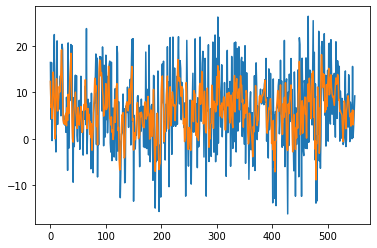

In [59]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

evaluation = './results/TD3_16500_evaluations.npy'
reward = './results/TD3_16500_episode_rewards.npy'
a = np.load(evaluation)
b = np.load(reward)
plt.plot(b)
plt.plot(moving_average(b,3))

In [69]:
env.reset()
env.start_year =2017
env.start_month =1
done=False
while not done:
    action = policy.select_action(np.array(state))
    #print(np.array(state))
    #print(action)
    action = action+0*np.random.randn(len(action))
    state, reward, done = env.step(action)
    #print(reward)
    time.sleep(.1)
print(env.profilios)

[[('LU0063729296', 0.1603918478166394), ('HK0000055670', 0.15461892013843823), ('US4642864007', 0.17656132793498447), ('LU0095024591', 0.18239274231348546), ('LU0133711647', 0.1264398309763898), ('US4642874329', 0.19959533082006253)], [('LU0063729296', 0.15261430803009465), ('HK0000055670', 0.15588548957562337), ('US4642864007', 0.17794465704447354), ('LU0095024591', 0.18940591199988832), ('LU0133711647', 0.11757170985017229), ('US4642874329', 0.20657792349974788)], [('LU0063729296', 0.15140168453093616), ('HK0000055670', 0.15612699043464034), ('US4642864007', 0.17892768257113847), ('LU0095024591', 0.18877831965391986), ('LU0133711647', 0.11535636173027827), ('US4642874329', 0.20940896107908705)], [('LU0063729296', 0.17075470409112564), ('HK0000055670', 0.1429578226328859), ('US4642864007', 0.19222668127106932), ('LU0095024591', 0.15251621275882296), ('LU0133711647', 0.11399232276725248), ('US4642874329', 0.22755225647884375)], [('LU0063729296', 0.15625725834962634), ('HK0000055670', 0